# Tree Methods Consulting Project 

You've been hired by a dog food company to try to predict why some batches of their dog food are spoiling much quicker than intended! Unfortunately this Dog Food company hasn't upgraded to the latest machinery, meaning that the amounts of the five preservative chemicals they are using can vary a lot, but which is the chemical that has the strongest effect? The dog food company first mixes up a batch of preservative that contains 4 different preservative chemicals (A,B,C,D) and then is completed with a "filler" chemical. The food scientists beelive one of the A,B,C, or D preservatives is causing the problem, but need your help to figure out which one!
Use Machine Learning with RF to find out which parameter had the most predicitive power, thus finding out which chemical causes the early spoiling! So create a model and then find out how you can decide which chemical is the problem!

* Pres_A : Percentage of preservative A in the mix
* Pres_B : Percentage of preservative B in the mix
* Pres_C : Percentage of preservative C in the mix
* Pres_D : Percentage of preservative D in the mix
* Spoiled: Label indicating whether or not the dog food batch was spoiled.
___

**Think carefully about what this problem is really asking you to solve. While we will use Machine Learning to solve this, it won't be with your typical train/test split workflow. If this confuses you, skip ahead to the solution code along walk-through!**
____

# Good Luck!

In [1]:
import pyspark
import findspark
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.getOrCreate()

In [3]:
df=spark.read.csv('dog_food.csv', inferSchema=True, header=True)

In [5]:
df.show()

+---+---+----+---+-------+
|  A|  B|   C|  D|Spoiled|
+---+---+----+---+-------+
|  4|  2|12.0|  3|    1.0|
|  5|  6|12.0|  7|    1.0|
|  6|  2|13.0|  6|    1.0|
|  4|  2|12.0|  1|    1.0|
|  4|  2|12.0|  3|    1.0|
| 10|  3|13.0|  9|    1.0|
|  8|  5|14.0|  5|    1.0|
|  5|  8|12.0|  8|    1.0|
|  6|  5|12.0|  9|    1.0|
|  3|  3|12.0|  1|    1.0|
|  9|  8|11.0|  3|    1.0|
|  1| 10|12.0|  3|    1.0|
|  1|  5|13.0| 10|    1.0|
|  2| 10|12.0|  6|    1.0|
|  1| 10|11.0|  4|    1.0|
|  5|  3|12.0|  2|    1.0|
|  4|  9|11.0|  8|    1.0|
|  5|  1|11.0|  1|    1.0|
|  4|  9|12.0| 10|    1.0|
|  5|  8|10.0|  9|    1.0|
+---+---+----+---+-------+
only showing top 20 rows



In [6]:
df_pd=df.toPandas()

C:\Users\bishw\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
df_pd.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\bishw\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bishw\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bishw\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


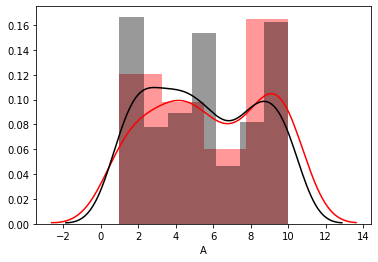

In [17]:
sns.distplot(df_pd.loc[df_pd.Spoiled==1,'A'], color='#FF0000')
sns.distplot(df_pd.loc[df_pd.Spoiled==0,'A'], color="#000000")

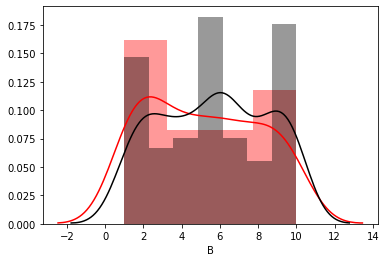

In [18]:
sns.distplot(df_pd.loc[df_pd.Spoiled==1,'B'],color='#FF0000')
sns.distplot(df_pd.loc[df_pd.Spoiled==0,'B'],color="#000000")

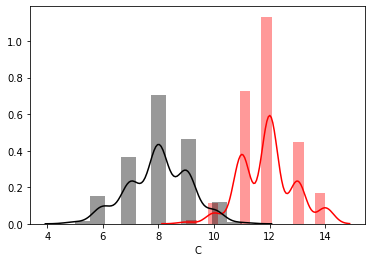

In [19]:
sns.distplot(df_pd.loc[df_pd.Spoiled==1,'C'],color='#FF0000')
sns.distplot(df_pd.loc[df_pd.Spoiled==0,'C'],color="#000000")

# Using high conc of C is actually spoling the food. C should be used less then 10 units

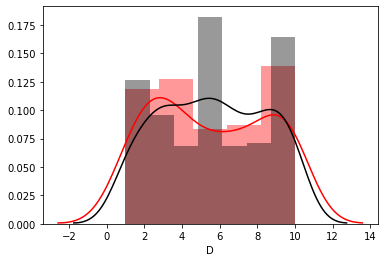

In [20]:
sns.distplot(df_pd.loc[df_pd.Spoiled==1,'D'],color='#FF0000')
sns.distplot(df_pd.loc[df_pd.Spoiled==0,'D'],color="#000000")

In [9]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, Normalizer

In [22]:
df.columns

['A', 'B', 'C', 'D', 'Spoiled']

In [10]:
vec=VectorAssembler(inputCols=['A', 'B', 'C', 'D'], outputCol='features')

In [33]:
norm=Normalizer(inputCol='features', outputCol='Normalized_feat')

+---+---+----+---+-------+-------------------+--------------------+
|  A|  B|   C|  D|Spoiled|           features|     Normalized_feat|
+---+---+----+---+-------+-------------------+--------------------+
|  4|  2|12.0|  3|    1.0| [4.0,2.0,12.0,3.0]|[0.30411436850788...|
|  5|  6|12.0|  7|    1.0| [5.0,6.0,12.0,7.0]|[0.31372790256907...|
|  6|  2|13.0|  6|    1.0| [6.0,2.0,13.0,6.0]|[0.38332593899996...|
|  4|  2|12.0|  1|    1.0| [4.0,2.0,12.0,1.0]|[0.31139957766460...|
|  4|  2|12.0|  3|    1.0| [4.0,2.0,12.0,3.0]|[0.30411436850788...|
| 10|  3|13.0|  9|    1.0|[10.0,3.0,13.0,9.0]|[0.52777981396925...|
|  8|  5|14.0|  5|    1.0| [8.0,5.0,14.0,5.0]|[0.45436946739765...|
|  5|  8|12.0|  8|    1.0| [5.0,8.0,12.0,8.0]|[0.29012942659282...|
|  6|  5|12.0|  9|    1.0| [6.0,5.0,12.0,9.0]|[0.35478743759344...|
|  3|  3|12.0|  1|    1.0| [3.0,3.0,12.0,1.0]|[0.23497813499638...|
|  9|  8|11.0|  3|    1.0| [9.0,8.0,11.0,3.0]|[0.54272042023997...|
|  1| 10|12.0|  3|    1.0|[1.0,10.0,12.0,3.0]|[0

In [ ]:
rfc=RandomForestClassifier(featuresCol='Normalized_feat',labelCol='Spoiled')

In [5]:
train,test=df.randomSplit([0.7,0.3], seed=1429)

In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [19]:
evalu=MulticlassClassificationEvaluator(predictionCol='prediction',
                                       labelCol='Spoiled',metricName='accuracy')

In [39]:
from pyspark.ml import tuning
import numpy as np

In [40]:
grid=tuning.ParamGridBuilder()

In [41]:
grid=grid.addGrid(rfc.maxDepth,[2,4,8,15])
grid=grid.addGrid(rfc.numTrees,[100,200,500])

In [42]:
grid=grid.build()

In [43]:
cv=tuning.CrossValidator(estimator=rfc,
                        estimatorParamMaps=grid,
                        evaluator=evalu)

In [7]:
from pyspark.ml import Pipeline

In [44]:
pipe=Pipeline(stages=[vec, norm, cv])

In [45]:
cls=pipe.fit(train)

In [46]:
pred=cls.transform(test)

In [47]:
evalu.evaluate(pred)

0.74